In [36]:
import numpy as np
import pandas as pd
import os
import pdb
import math
import matplotlib.pyplot as plta
import pylab
import matplotlib.animation as animation
from scipy.spatial import distance
from scipy.spatial.distance import euclidean
from mpl_toolkits.mplot3d import Axes3D
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2 +(p0[2] - p1[2])**2  )
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

# Open up peaks 

In [37]:
colspecs_pdb = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26),
            (26, 27), (30, 38), (38, 46), (46, 54), (54, 60), (60, 66), (76, 78),
            (78, 80)]


names_pdb = ['ATOM', 'serial', 'name', 'altloc', 'resname', 'chainid', 'resseq',
         'icode', 'x', 'y', 'z', 'occupancy', 'tempfactor', 'element', 'charge']

pdb_path = '/Users/yyk_lab/Downloads/peaks_p212121_OW.pdb'
peaks = pd.read_fwf(pdb_path, names=names_pdb, colspecs=colspecs_pdb,skiprows=4)
peaks

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
0,ATOM,5678.0,O,NaN,HOH,X,1.0,NaN,6.233,-23.774,7.422,11.91,11.91,O,NaN
1,ATOM,5678.0,O,NaN,HOH,X,2.0,NaN,123.796,-23.774,7.422,11.91,11.91,O,NaN
2,ATOM,17046.0,O,NaN,HOH,X,3.0,NaN,73.471,28.074,54.354,11.85,11.85,O,NaN
3,ATOM,10406.0,O,NaN,HOH,X,4.0,NaN,35.141,-6.944,38.262,11.80,11.80,O,NaN
4,ATOM,12073.0,O,NaN,HOH,X,5.0,NaN,45.075,23.753,69.259,11.67,11.67,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,ATOM,1475.0,O,NaN,HOH,Z,7865.0,NaN,-18.097,-25.190,-0.388,2.04,2.04,O,NaN
27863,ATOM,3359.0,O,NaN,HOH,Z,7866.0,NaN,111.019,6.940,1.040,2.04,2.04,O,NaN
27864,ATOM,13332.0,O,NaN,HOH,Z,7867.0,NaN,52.237,104.501,-1.040,2.04,2.04,O,NaN
27865,ATOM,3359.0,O,NaN,HOH,Z,7868.0,NaN,-6.544,6.940,1.040,2.04,2.04,O,NaN


In [38]:
peaks_in_roi = peaks.copy()

# Define ROI

In [39]:
# Select chain of interest and reference structure 
chain ='A'
gro_path = '/Users/yyk_lab/0F-coot-0.pdb'


reference = pd.read_fwf(gro_path, names=names_pdb, colspecs=colspecs_pdb, skiprows=4)
ROI2 = reference[(reference['resname'] =='OEC') & (reference['chainid'] ==chain) & (reference['name'] =='O1') ]
ROI3 = reference[(reference['resname'] =='OEC') & (reference['chainid'] =='a') & (reference['name'] =='O1') ]


# Select random resid in bulk, make sure it is far away from OEC
ROI = reference[(reference['resname'] =='HOH') & (reference['resseq'] ==1549) ]
print("Bulk H20 distance to OEC1 is %0.2f" %distance([float(ROI2['x'].values[0]),float(ROI2['y'].values[0]),float(ROI2['z'].values[0])], [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]))
print("Bulk H20 distance to OEC2 is %0.2f" %distance([float(ROI3['x'].values[0]),float(ROI3['y'].values[0]),float(ROI3['z'].values[0])], [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]))


# Decide if you want ROI to be random water in bulk, or OEC:
OEC=False
if OEC==1:
    ROI = ROI2 
elif OEC==2:
    ROI=ROI3 
else:
    ROI=ROI

Bulk H20 distance to OEC1 is 70.36
Bulk H20 distance to OEC2 is 104.19


# All waters in XTAL structure

In [40]:
ref2=reference[(reference['resname']=='OOO') | (reference['resname']=='HOH')]
df =ref2
df

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
16552,HETATM,16553.0,O,NaN,OOO,G,1.0,NaN,65.015,58.185,50.021,1.00,24.85,O,NaN
16553,HETATM,16554.0,O,NaN,OOO,G,2.0,NaN,19.633,54.658,51.427,1.00,35.38,O,NaN
16554,HETATM,16555.0,O,NaN,OOO,G,3.0,NaN,41.230,28.768,37.888,1.00,24.88,O,NaN
16555,HETATM,16556.0,O,NaN,OOO,G,4.0,NaN,34.363,54.709,27.050,1.00,28.43,O,NaN
16556,HETATM,16557.0,O,NaN,OOO,G,5.0,NaN,96.040,66.311,58.328,1.00,36.18,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52252,HETATM,52253.0,O,NaN,HOH,S,1796.0,NaN,22.805,59.152,-0.092,1.00,57.12,O,NaN
52253,HETATM,52254.0,O,NaN,HOH,S,1797.0,NaN,93.819,74.558,19.760,0.98,61.32,O,NaN
52254,HETATM,52255.0,O,NaN,HOH,S,1798.0,NaN,21.793,75.416,31.344,1.00,72.32,O,NaN
52255,HETATM,52256.0,O,NaN,HOH,S,1799.0,NaN,22.847,-59.518,21.549,1.00,65.81,O,NaN


# Make list of XTAL waters found in ROI

In [41]:
ref_waters_in_OEC = []
OEC_ROI = 30
    
for n,rew in df.iterrows():
    point1= [float(df.loc[n,'x']),float(df.loc[n,'y']),float(df.loc[n,'z'])]
  
    point2= [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]
    if ((distance(point1,point2) < OEC_ROI )):
        ref_waters_in_OEC.append(df.loc[n])

ref_waters_in_OEC=pd.DataFrame(ref_waters_in_OEC)
ref_waters_in_OEC

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
50657,HETATM,50658.0,O,NaN,HOH,S,201.0,NaN,50.631,72.790,35.408,1.0,28.61,O,NaN
50658,HETATM,50659.0,O,NaN,HOH,S,202.0,NaN,50.655,80.028,31.819,1.0,36.41,O,NaN
50798,HETATM,50799.0,O,NaN,HOH,S,342.0,NaN,54.115,64.882,27.240,1.0,30.43,O,NaN
50831,HETATM,50832.0,O,NaN,HOH,S,375.0,NaN,56.093,65.190,25.520,1.0,32.75,O,NaN
50834,HETATM,50835.0,O,NaN,HOH,S,378.0,NaN,52.915,69.846,15.161,1.0,40.94,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52220,HETATM,52221.0,O,NaN,HOH,S,1764.0,NaN,30.055,77.541,30.693,1.0,56.53,O,NaN
52246,HETATM,52247.0,O,NaN,HOH,S,1790.0,NaN,31.388,73.872,33.148,1.0,60.39,O,NaN
52247,HETATM,52248.0,O,NaN,HOH,S,1791.0,NaN,20.330,73.136,29.870,1.0,52.81,O,NaN
52248,HETATM,52249.0,O,NaN,HOH,S,1792.0,NaN,30.704,75.723,31.606,1.0,68.43,O,NaN


# Make list of peaks in ROI

In [42]:
peaks_in_OEC=[]
for z,ruw in peaks_in_roi.iterrows():
    point1= [float(peaks_in_roi.loc[z,'x']),float(peaks_in_roi.loc[z,'y']),float(peaks_in_roi.loc[z,'z'])]
    point2= [float(ROI['x'].values[0]),float(ROI['y'].values[0]),float(ROI['z'].values[0])]
    if ((distance(point1,point2) < OEC_ROI) ):
        peaks_in_OEC.append(peaks_in_roi.loc[z])
peaks_in_OEC=pd.DataFrame(peaks_in_OEC)
peaks_in_OEC 

,ATOM,serial,name,altloc,resname,chainid,resseq,icode,x,y,z,occupancy,tempfactor,element,charge
19,ATOM,13100.0,O,NaN,HOH,X,20.0,NaN,50.955,80.307,32.037,11.46,11.46,O,NaN
22,ATOM,9997.0,O,NaN,HOH,X,23.0,NaN,33.254,83.666,7.322,11.45,11.45,O,NaN
62,ATOM,12128.0,O,NaN,HOH,X,63.0,NaN,45.461,86.786,29.624,11.26,11.26,O,NaN
96,ATOM,13843.0,O,NaN,HOH,X,97.0,NaN,55.368,85.655,35.589,11.12,11.12,O,NaN
143,ATOM,11656.0,O,NaN,HOH,X,144.0,NaN,42.599,86.508,29.881,11.02,11.02,O,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27735,ATOM,8062.0,O,NaN,HOH,Z,7738.0,NaN,20.578,71.818,38.324,2.04,2.04,O,NaN
27738,ATOM,14898.0,O,NaN,HOH,Z,7741.0,NaN,61.846,103.226,23.630,2.04,2.04,O,NaN
27783,ATOM,7473.0,O,NaN,HOH,Z,7786.0,NaN,17.043,79.719,13.097,2.04,2.04,O,NaN
27815,ATOM,11660.0,O,NaN,HOH,Z,7818.0,NaN,42.589,95.633,40.341,2.04,2.04,O,NaN


## Find matches to MD peaks

In [43]:
matches= pd.DataFrame(columns=['XTAL ID', 'Closest MD Partner', 'Dist', 'Thresh']) #xtal waters
matches_all =pd.DataFrame(columns=['MD ID', 'Closest XTAL Partner', 'Dist', "Thresh"])  #md_peaks
dist_array=[]
partner_array=[]
strength_array=[]
peaks_in_OEC =pd.DataFrame( peaks_in_OEC)
ref_waters_in_OEC =pd.DataFrame( ref_waters_in_OEC )

peaks_array=peaks_in_OEC['resseq']
water_array=ref_waters_in_OEC['resseq']


for h,rhu in peaks_in_OEC.iterrows():
    point1= [float(peaks_in_OEC.loc[h,'x']),float(peaks_in_OEC.loc[h,'y']),float(peaks_in_OEC.loc[h,'z'])]
    dist=10000
    partner=0
    strength= peaks_in_OEC.loc[h,'occupancy']
    for z,r in ref_waters_in_OEC.iterrows():
        point2= [float(ref_waters_in_OEC.loc[z,'x']),float(ref_waters_in_OEC.loc[z,'y']),float(ref_waters_in_OEC.loc[z,'z'])]
        dist_try=distance(point1,point2)
        if dist_try <dist:
            dist=dist_try #update value
            partner= ref_waters_in_OEC.loc[z,'resseq']
    dist_array.append(dist)
    partner_array.append(partner)      
    strength_array.append(strength)
matches_all['MD ID'] = peaks_array
matches_all['Closest XTAL Partner'] = partner_array
matches_all['Dist'] = dist_array
matches_all['Thresh'] = strength_array



# Find matches to XTAL waters

In [44]:
dist_array=[]
partner_array=[]
strength_array=[]

for h,rhu in ref_waters_in_OEC.iterrows():
    point1= [float(ref_waters_in_OEC.loc[h,'x']),float(ref_waters_in_OEC.loc[h,'y']),float(ref_waters_in_OEC.loc[h,'z'])]
    dist=10000
    partner=0
    strength=0
    for z,r in peaks_in_OEC.iterrows():
        point2= [float(peaks_in_OEC.loc[z,'x']),float(peaks_in_OEC.loc[z,'y']),float(peaks_in_OEC.loc[z,'z'])]
        dist_try=distance(point1,point2)
        if dist_try <dist:
            dist=dist_try #update value
            partner= peaks_in_OEC.loc[z,'resseq']
            strength=peaks_in_OEC.loc[z,'occupancy']
    dist_array.append(dist)
    partner_array.append(partner)   
    strength_array.append(strength)     

matches['XTAL ID'] = water_array
matches['Closest MD Partner'] = partner_array
matches['Dist'] = dist_array
matches['Thresh'] = strength_array


# Precision/recall time 

In [45]:
pr=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1')) #precision/recall dataframe 0.5 dist
pr2=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1')) #precision/recall dataframe 1.0 dist
pr3=pd.DataFrame(columns=('thresh', 'recall', 'precision', 'f1')) #precision/recall dataframe 1.4 dist
npr = 100 #number of precision/recall peaks we want 
df1=matches_all
df2=matches

pmax = np.max(df1['Thresh']) 
pmin = np.min(df1['Thresh']) 

df1= df1.sort_values(by=['Dist']) 
df2 = df2.sort_values(by=['Dist'])
df1_copy = df1.copy()
df2_copy = df2.copy()
df1_copy

,MD ID,Closest XTAL Partner,Dist,Thresh
354,355.0,693.0,0.073389,10.63
143,144.0,598.0,0.216816,11.02
2866,2867.0,607.0,0.225889,7.97
767,768.0,552.0,0.246150,10.17
2351,2352.0,555.0,0.250500,8.43
...,...,...,...,...
1068,1069.0,1634.0,25.542644,9.86
5222,5223.0,1303.0,25.986050,6.46
10764,766.0,1504.0,25.992096,4.35
18987,8989.0,1634.0,26.565676,2.87


In [46]:
z=0
distance = [0.5,1.0,1.4]

pr_array=[pr,pr2,pr3]
all_pr=[]
for pr_all in pr_array:

    dist= distance[z]
    print(dist)

    for j in range(1,101): #only calculating 100 precision/recalls
        thresh= (pmax-pmin)/npr*(j-1)+pmin
        n=0
        t=0
        nt=0
        r=0
        s=0
        s1=0
        f=0
        ns = len(matches)
  
#######################################

        for i in range(0,len(df1_copy)): 
            if (df1_copy['Thresh'].values[i] >= thresh):
                nt=nt+1
                if(df1_copy['Dist'].values[i] <= dist):
                    n=n+1

        if (n > 0):
            p=n/nt

        for k in range(0, len(df2_copy)):

            if (df2_copy['Thresh'].values[k] >= thresh):
                if (df2_copy['Dist'].values[k] <= dist):
                    t=t+1


        if (t> 0):
            r=t/ns 
        f= 2*r*p/(r+p)     #f1 score is harmonc    

        pr_all.loc[j]=[thresh, r, p,f]
         
    all_pr.append(pr_all)
    z=z+1

0.5
1.0
1.4


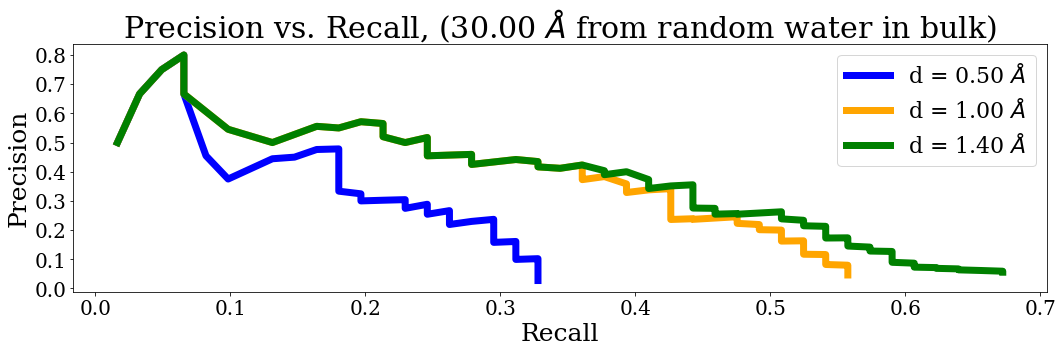

In [47]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
fig = plt.figure(figsize=[15,5])
plt.plot(all_pr[0].recall, all_pr[0].precision, color ='blue',  linewidth=7,label = "d = %0.2f $\AA$ " %distance[0])
plt.plot(all_pr[1].recall, all_pr[1].precision, color = 'orange',  linewidth=7, label = "d = %0.2f $\AA$" %distance[1])
plt.plot(all_pr[2].recall, all_pr[2].precision, color ='green',  linewidth=7, label = "d = %0.2f $\AA$"%distance[2] )

plt.legend(loc=1, prop={'size': 22})

if OEC ==1 or OEC ==2:
    plt.title('Reference: \nPrecision vs. Recall, (%0.2f $\AA$ from OEC), Chain %s' %(OEC_ROI, chain),fontsize=30)
else: 
    plt.title('Precision vs. Recall, (%0.2f $\AA$ from random water in bulk)' %(OEC_ROI),fontsize=30)

plt.xlabel('Recall', fontsize=25)
plt.ylabel('Precision',  fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('pr_rand.pdf')